In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import pair_confusion_matrix

In [ ]:
# If the last import doesn't work, please run the code below
!pip install --upgrade scikit-learn

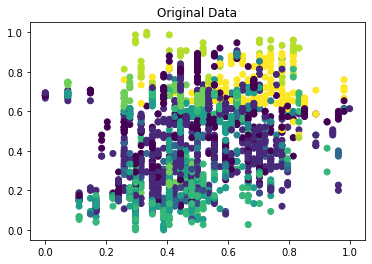

In [2]:
X = pd.read_excel('CTG(1).xlsx',usecols = "A:U")  # loading the input data
Y = pd.read_excel('CTG(1).xlsx',usecols = "V")  # loading the output data
input = X[1:].values
output = Y[1:].values

# plot the original data
plt.scatter(input[:,0], input[:,7], c=output)
plt.title("Original Data")
plt.show()


predictions:  1 9 9 5 5 9 9 1 1 1 5 5 1 1 9 9 5 9 1 9 9 9 8 7 7 3 6 3 9 9 9 9 9 9 9 9 9 9 9 9 9 9 1 9 9 9 9 9 9 5 4 5 9 7 7 5 5 3 4 5 4 4 4 9 5 3 5 4 4 7 7 5 5 5 5 5 4 5 5 5 5 9 9 5 5 5 5 9 5 9 7 7 7 7 7 7 7 7 7 6 0 0 1 0 1 9 9 9 9 1 9 9 9 0 9 9 9 0 0 0 9 2 1 9 1 7 7 7 7 7 3 7 3 7 7 7 7 7 4 4 4 5 5 5 5 5 5 5 5 7 7 7 5 6 6 0 0 0 6 0 6 6 1 0 1 9 9 2 2 1 1 0 0 0 0 9 1 9 0 9 9 5 1 9 5 9 1 7 4 4 5 7 4 7 4 4 4 7 4 1 1 0 0 0 0 0 1 1 1 1 1 4 2 1 1 4 1 1 1 1 1 4 1 4 4 4 1 1 1 1 1 1 1 1 1 1 0 0 3 7 3 1 3 1 2 9 1 4 4 3 3 5 1 6 6 9 9 9 9 1 6 6 6 6 0 4 1 1 4 1 0 0 1 1 1 1 1 0 0 2 2 9 4 4 4 7 7 4 4 7 7 5 5 5 2 3 3 3 7 7 3 3 3 6 7 6 7 3 7 7 7 7 3 7 7 3 7 3 7 3 7 7 5 7 7 9 7 3 3 3 3 3 3 7 7 3 1 4 4 3 3 3 3 7 7 3 3 7 7 3 7 3 3 3 7 2 1 1 1 1 3 3 7 3 3 7 3 7 4 3 7 1 7 7 7 7 5 5 7 4 5 9 9 6 4 9 5 9 1 9 9 7 3 5 5 7 5 7 3 5 3 5 3 3 5 5 7 7 7 7 7 3 4 7 2 4 6 6 3 6 6 4 5 4 4 7 4 1 6 9 1 0 9 4 5 5 5 5 5 5 5 5 5 4 6 3 3 3 5 5 4 5 9 4 4 4 1 5 5 5 0 6 0 2 2 2 6 6 6 3 7 3 4 3 7 3 5 4 7 7 2 7 6 5 5 3 9 9 9 9 5 5 5

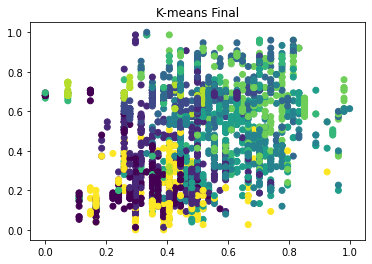

homogeneity score:  0.22127435191931483
completeness score:  0.24187469833386258
v-measure score:  0.23111638506113094
clusters created:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Confusion matrix: 
[[3405476  388402]
 [ 583608  140264]]


In [3]:
# Using the K-means cluster
kmeans = KMeans(n_clusters=10, random_state=0) # define the model
kmeans = kmeans.fit(input) # fit the model
labels = kmeans.labels_ # predictions
print("\npredictions: ", *labels)
print("original: ", *output.flatten().tolist())

# plot the results
plt.scatter(input[:,0], input[:,7], c=labels)
plt.title("K-means Final")
plt.show()

# Metrics
print("homogeneity score: ", homogeneity_score(labels.flatten().tolist(), output.flatten().tolist()))
print("completeness score: ", completeness_score(labels.flatten().tolist(), output.flatten().tolist()))
print("v-measure score: ", v_measure_score(labels.flatten().tolist(), output.flatten().tolist()))

# printing the unique values of the list
print("clusters created: ", set(labels))

# Confusion matrix
print("\nConfusion matrix: ")
print(pair_confusion_matrix(output.flatten().tolist(),labels.tolist()))


predictions:  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 0 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 0 0 -1 -1 1 1 0 1 1 1 2 0 1 -1 1 1 0 0 0 0 0 0 0 1 0 -1 -1 -1 -1 -1 0 -1 -1 -1 -1 0 -1 0 0 0 0 0 0 0 -1 0 -1 1 1 0 1 0 -1 -1 1 2 0 -1 2 -1 1 -1 -1 -1 1 1 1 -1 -1 -1 2 0 -1 -1 -1 -1 -1 1 -1 1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 0 0 0 0 0 0 0 -1 -1 -1 1 1 1 -1 1 -1 -1 0 1 0 -1 -1 -1 -1 -1 -1 1 1 1 1 2 0 2 1 2 -1 -1 0 2 -1 -1 0 -1 -1 1 -1 0 1 0 1 1 1 -1 1 0 0 1 1 1 1 1 0 0 0 -1 0 1 2 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 -1 -1 -1 1 -1 -1 2 0 1 1 1 1 -1 0 -1 -1 2 2 -1 -1 0 -1 -1 -1 -1 1 1 0 0 1 0 1 1 -1 0 -1 0 0 1 1 3 -1 -1 1 1 1 0 0 1 1 0 0 -1 -1 -1 -1 -1 1 1 0 0 1 1 1 -1 0 -1 0 1 -1 0 0 0 1 0 0 1 0 1 0 1 0 0 -1 -1 -1 -1 -1 1 1 1 1 1 1 -1 -1 1 0 1 1 1 1 1 1 -1 0 1 1 0 0 1 0 1 1 1 0 -1 0 0 0 0 1 1 -1 1 1 0 1 -1 1 1 0 0 0 0 0 0 -1 0 0 1 0 -1 -1 -1 1 -1 -1 -1 0 -1 -1 0 1 0 0 0 0 0 1 -1 1 -1 1 1 -1 -1 0 0 0 0 0 

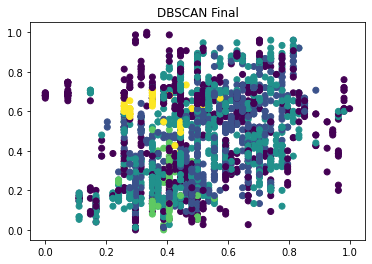

homogeneity score:  0.12033470860410786
completeness score:  0.07795415608348252
v-measure score:  0.09461540537401728
clusters created:  {0, 1, 2, 3, -1}

Confusion matrix: 
[[2709114 1084764]
 [ 475226  248646]]


In [4]:
# Using the DBSCAN cluster
dbscan = DBSCAN(eps=0.3, min_samples=25) # define the model
dbscan = dbscan.fit(input) # fit the model
labels1 = dbscan.labels_  # predictions
print("\npredictions: ", *labels1)
print("original: ", *output.flatten().tolist())

# plot the results
plt.scatter(input[:,0], input[:,7], c=labels1)
plt.title("DBSCAN Final")
plt.show()

# Metrics
print("homogeneity score: ", homogeneity_score(labels1.flatten().tolist(), output.flatten().tolist()))
print("completeness score: ", completeness_score(labels1.flatten().tolist(), output.flatten().tolist()))
print("v-measure score: ", v_measure_score(labels1.flatten().tolist(), output.flatten().tolist()))

# printing the unique values of the list
print("clusters created: ", set(labels1))

# Confusion matrix
print("\nConfusion matrix: ")
print(pair_confusion_matrix(output.flatten().tolist(),labels1.tolist()))


predictions:  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 45 45 -1 45 -1 45 -1 45 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 63 64 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 19 19 70 70 66 66 66 66 -1 -1 73 73 -1 73 -1 -1 -1 -1 -1 73 -1 -1 -1 -1 64 64 64 64 -1 -1 -1 63 85 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 2 -1 -1 -1 -1 -1 4 4 4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 85 85 9 9 9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 19 -1 70 -1 70 -1 -1 -1 70 -1 49 49 -1 28 28 28 28 49 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 13 -1 -1 48 48 48 50 -1 -1 -1 -1 -1 -1 28 28 -1 79 26 -1 -1 -1 -1 2 48 -1 -1 -1 -1 -1 -1 81 81 -1 -1 -1 -1 -1 85 85 85 85 -1 -1 -1 -1 13 48 -1 -1 -1 -1 -1 48 -1 -1 28 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 64 -1 -1 -1 -1 -1 -1 -1 -1 64 64 -1 -1 -1 87 -1 87 -1 16 -1 -1 -1 64 -1 -1 -1 -1 -1 -1 -1 -1 -1 63 -1 -1 -1 -1 -1 -1 -1 -1 -1 

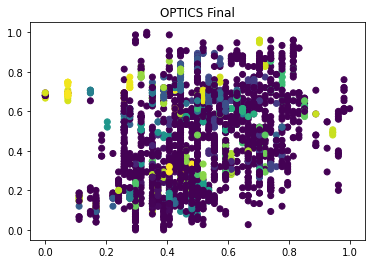

homogeneity score:  0.2378749180266728
completeness score:  0.2482489340695621
v-measure score:  0.24295123387739384
clusters created:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, -1}

Confusion matrix: 
[[2067490 1726388]
 [ 407308  316564]]


In [5]:
# Using the OPTICS cluster
optics = OPTICS(min_samples=5, max_eps=0.5) # define the model
optics = optics.fit(input) # fit the model
labels2 = optics.labels_ # predictions
print("\npredictions: ", *labels2)
print("original: ", *output.flatten().tolist())

# plot the results
plt.scatter(input[:,0], input[:,7], c=labels2)
plt.title("OPTICS Final")
plt.show()

# Metrics
print("homogeneity score: ", homogeneity_score(labels2.flatten().tolist(), output.flatten().tolist()))
print("completeness score: ", completeness_score(labels2.flatten().tolist(), output.flatten().tolist()))
print("v-measure score: ", v_measure_score(labels2.flatten().tolist(), output.flatten().tolist()))

# printing the unique values of the list
print("clusters created: ", set(labels2))

# Confusion matrix
print("\nConfusion matrix: ")
print(pair_confusion_matrix(output.flatten().tolist(),labels2.tolist()))